In [3]:
import openpyxl
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



In [4]:
data = pd.read_excel(f'../data_tubes.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Nim                            590 non-null    object
 1   Penghasilan Orang Tua          590 non-null    int64 
 2   Biaya hidup keluarga perbulan  590 non-null    int64 
 3   Tagihan listrik perbulan       590 non-null    int64 
 4   Jumlah Rumah                   590 non-null    object
 5   Jumlah mobil                   590 non-null    int64 
 6   Jumlah motor                   590 non-null    object
 7   Jumlah laptop                  590 non-null    int64 
 8   Jumlah handphone               590 non-null    object
 9   Jumlah televisi                590 non-null    object
 10  Jumlah kulkas                  590 non-null    int64 
 11  Jumlah mesin cuci              590 non-null    int64 
 12  UKT                            590 non-null    int64 
dtypes: in

In [5]:
data.head()

,Nim,Penghasilan Orang Tua,Biaya hidup keluarga perbulan,Tagihan listrik perbulan,Jumlah Rumah,Jumlah mobil,Jumlah motor,Jumlah laptop,Jumlah handphone,Jumlah televisi,Jumlah kulkas,Jumlah mesin cuci,UKT
0,1185011XXXX,3000000,1600000,250000,1,1,3,2,4,1,1,1,4
1,1185011XXXX,1500000,1500000,150000,1,0,2,1,5,1,1,1,3
2,1185011XXXX,3660000,2000000,200000,0,0,0,0,0,0,0,0,4
3,1185011XXXX,1340000,740000,50000,0,0,0,0,1,1,0,0,2
4,1185011XXXX,1300000,600000,50000,0,0,2,1,3,1,1,0,2


In [6]:
kolom_yang_akan_dihapus = ['Nim']
data_selection = data.drop(columns=kolom_yang_akan_dihapus)
data_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Penghasilan Orang Tua          590 non-null    int64 
 1   Biaya hidup keluarga perbulan  590 non-null    int64 
 2   Tagihan listrik perbulan       590 non-null    int64 
 3   Jumlah Rumah                   590 non-null    object
 4   Jumlah mobil                   590 non-null    int64 
 5   Jumlah motor                   590 non-null    object
 6   Jumlah laptop                  590 non-null    int64 
 7   Jumlah handphone               590 non-null    object
 8   Jumlah televisi                590 non-null    object
 9   Jumlah kulkas                  590 non-null    int64 
 10  Jumlah mesin cuci              590 non-null    int64 
 11  UKT                            590 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 55.4+ KB


In [7]:
jumlah_data_null = data_selection.isnull().sum().sort_values(ascending=False)
print(jumlah_data_null)
data_cleaning = data_selection.dropna()
print(data_cleaning)

Penghasilan Orang Tua            0
Biaya hidup keluarga perbulan    0
Tagihan listrik perbulan         0
Jumlah Rumah                     0
Jumlah mobil                     0
Jumlah motor                     0
Jumlah laptop                    0
Jumlah handphone                 0
Jumlah televisi                  0
Jumlah kulkas                    0
Jumlah mesin cuci                0
UKT                              0
dtype: int64
     Penghasilan Orang Tua  Biaya hidup keluarga perbulan  \
0                  3000000                        1600000   
1                  1500000                        1500000   
2                  3660000                        2000000   
3                  1340000                         740000   
4                  1300000                         600000   
..                     ...                            ...   
585                1000000                         900000   
586                 500000                         600000   
587               

In [8]:
count_duplicate_rows = data_cleaning.duplicated().sum()
print(count_duplicate_rows)
data_cleaning = data_cleaning.drop_duplicates()
count_duplicate_rows = data_cleaning.duplicated().sum()
print(count_duplicate_rows)

6
0


In [9]:
baris_dash = data_cleaning[data_cleaning.eq('-').any(axis=1)]
print(baris_dash)

     Penghasilan Orang Tua  Biaya hidup keluarga perbulan  \
298                6416300                        5000000   

     Tagihan listrik perbulan Jumlah Rumah  Jumlah mobil Jumlah motor  \
298                    500000            -             0            -   

     Jumlah laptop Jumlah handphone Jumlah televisi  Jumlah kulkas  \
298              0                -               -              0   

     Jumlah mesin cuci  UKT  
298                  0    5  


In [10]:
data_cleaned = data_cleaning[~data_cleaning.eq('-').any(axis=1)]


In [11]:
kolom_int = ["Jumlah Rumah","Jumlah motor","Jumlah handphone","Jumlah televisi"]
data_cleaned[kolom_int] = data_cleaned[kolom_int].astype(int)
data_transform = data_cleaned
data_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 589
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Penghasilan Orang Tua          583 non-null    int64
 1   Biaya hidup keluarga perbulan  583 non-null    int64
 2   Tagihan listrik perbulan       583 non-null    int64
 3   Jumlah Rumah                   583 non-null    int32
 4   Jumlah mobil                   583 non-null    int64
 5   Jumlah motor                   583 non-null    int32
 6   Jumlah laptop                  583 non-null    int64
 7   Jumlah handphone               583 non-null    int32
 8   Jumlah televisi                583 non-null    int32
 9   Jumlah kulkas                  583 non-null    int64
 10  Jumlah mesin cuci              583 non-null    int64
 11  UKT                            583 non-null    int64
dtypes: int32(4), int64(8)
memory usage: 50.1 KB


C:\Users\haikal\AppData\Local\Temp\ipykernel_145520\4082325904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[kolom_int] = data_cleaned[kolom_int].astype(int)


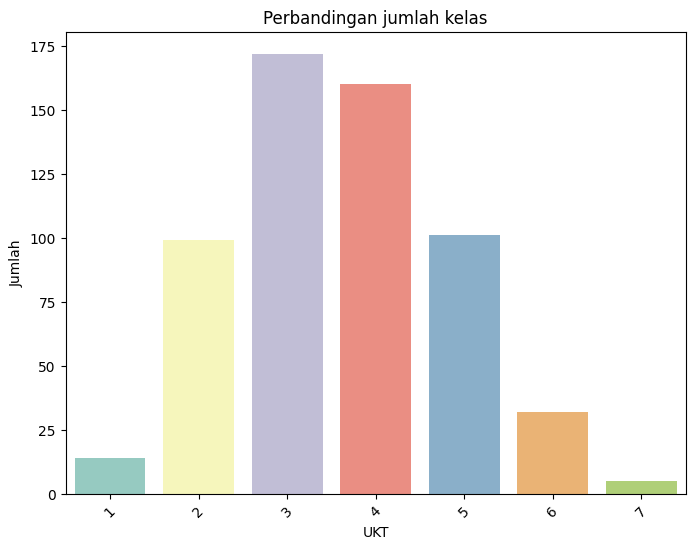

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_transform, x="UKT", palette="Set3")
plt.xlabel("UKT")
plt.ylabel("Jumlah")
plt.title("Perbandingan jumlah kelas")
plt.xticks(rotation=45)  
plt.show()

In [13]:
X = data_transform.drop("UKT", axis=1)
y = data_transform["UKT"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_data ,y, test_size=0.3, random_state=20)

hasil = []
for i in range(1,6):
    model = RandomForestClassifier(n_estimators=i, random_state=20)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    hasil.append({
            "parameter": {
                "jumlah_pohon": i
            },
            "akurasi": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
        })

c:\Users\haikal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\haikal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
workbook = openpyxl.Workbook()
worksheet = workbook.active
worksheet.title = "Tubes"
worksheet['A1'] = 'Parameter'
worksheet['B1'] = 'akurasi'
worksheet['C1'] = 'presisi'
worksheet['D1'] = 'recall'
worksheet['E1'] = 'f1'
for j in range(len(hasil)):
    worksheet[f'A{j+2}'] = str(hasil[j]["parameter"])
    worksheet[f'B{j+2}'] = hasil[j]["akurasi"]
    worksheet[f'C{j+2}'] = hasil[j]["precision"]
    worksheet[f'D{j+2}'] = hasil[j]["recall"]
    worksheet[f'E{j+2}'] = hasil[j]["f1"]


workbook.save("beforeRF.xlsx")

In [15]:
print(hasil)

[{'parameter': {'jumlah_pohon': 1}, 'akurasi': 0.8742857142857143, 'precision': 0.883667279980644, 'recall': 0.8742857142857143, 'f1': 0.876121498454694}, {'parameter': {'jumlah_pohon': 2}, 'akurasi': 0.9257142857142857, 'precision': 0.9280884353741495, 'recall': 0.9257142857142857, 'f1': 0.9244527172147473}, {'parameter': {'jumlah_pohon': 3}, 'akurasi': 0.9657142857142857, 'precision': 0.9689795918367347, 'recall': 0.9657142857142857, 'f1': 0.9664823348694316}, {'parameter': {'jumlah_pohon': 4}, 'akurasi': 0.9542857142857143, 'precision': 0.9641274615109202, 'recall': 0.9542857142857143, 'f1': 0.9573168101286855}, {'parameter': {'jumlah_pohon': 5}, 'akurasi': 0.9771428571428571, 'precision': 0.979079365079365, 'recall': 0.9771428571428571, 'f1': 0.9771261644588728}]


In [16]:
X = data_transform.drop("UKT", axis=1)
y = data_transform["UKT"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_data,y, test_size=0.3,random_state=20)
data_train = pd.concat([X_train,y_train],axis=1) 


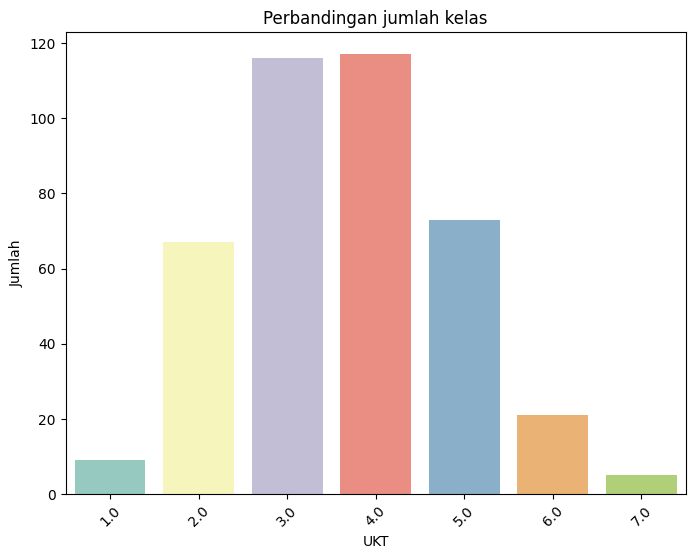

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_train, x="UKT", palette="Set3")
plt.xlabel("UKT")
plt.ylabel("Jumlah")
plt.title("Perbandingan jumlah kelas")
plt.xticks(rotation=45)  
plt.show()

In [18]:
data_train['UKT'].value_counts()

4.0    117
3.0    116
5.0     73
2.0     67
6.0     21
1.0      9
7.0      5
Name: UKT, dtype: int64

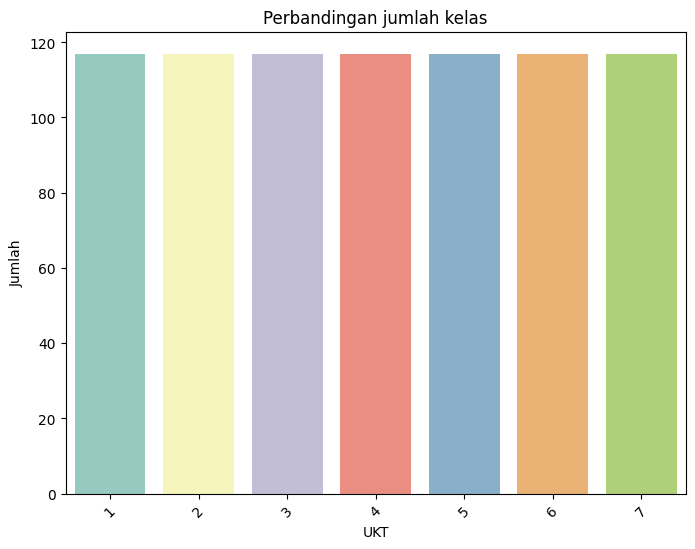

In [19]:
sm = SMOTE(sampling_strategy='auto', random_state=20,k_neighbors=3)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
data_balanced = pd.concat([X_resampled,y_resampled],axis=1) 
plt.figure(figsize=(8, 6))
sns.countplot(data=data_balanced, x="UKT", palette="Set3")
plt.xlabel("UKT")
plt.ylabel("Jumlah")
plt.title("Perbandingan jumlah kelas")
plt.xticks(rotation=45)  
plt.show()

In [20]:
# count_per_column = data_balanced['UKT'].value_counts()

# print(count_per_column)

In [21]:
hasil = []

for i in range(1,6):
    model = RandomForestClassifier(n_estimators=i, random_state=20)

    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    hasil.append({
            "parameter": {
                "jumlah_pohon": i
            },
            "akurasi": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
        })


0.9028571428571428
0.9257142857142857
0.9885714285714285
0.9771428571428571


c:\Users\haikal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9828571428571429


In [22]:
workbook = openpyxl.Workbook()
worksheet = workbook.active
worksheet.title = "Tubes"
worksheet['A1'] = 'Parameter'
worksheet['B1'] = 'akurasi'
worksheet['C1'] = 'presisi'
worksheet['D1'] = 'recall'
worksheet['E1'] = 'f1'
for j in range(len(hasil)):
    worksheet[f'A{j+2}'] = str(hasil[j]["parameter"])
    worksheet[f'B{j+2}'] = hasil[j]["akurasi"]
    worksheet[f'C{j+2}'] = hasil[j]["precision"]
    worksheet[f'D{j+2}'] = hasil[j]["recall"]
    worksheet[f'E{j+2}'] = hasil[j]["f1"]


workbook.save("afterRF.xlsx")

In [23]:
print(hasil)

[{'parameter': {'jumlah_pohon': 1}, 'akurasi': 0.9028571428571428, 'precision': 0.9071523423400738, 'recall': 0.9028571428571428, 'f1': 0.9028565018940958}, {'parameter': {'jumlah_pohon': 2}, 'akurasi': 0.9257142857142857, 'precision': 0.9285165143949003, 'recall': 0.9257142857142857, 'f1': 0.9253431428997932}, {'parameter': {'jumlah_pohon': 3}, 'akurasi': 0.9885714285714285, 'precision': 0.99, 'recall': 0.9885714285714285, 'f1': 0.9888580929077824}, {'parameter': {'jumlah_pohon': 4}, 'akurasi': 0.9771428571428571, 'precision': 0.978671679197995, 'recall': 0.9771428571428571, 'f1': 0.9772951137695819}, {'parameter': {'jumlah_pohon': 5}, 'akurasi': 0.9828571428571429, 'precision': 0.9843859649122807, 'recall': 0.9828571428571429, 'f1': 0.9831354781981817}]


In [24]:
print(conf_matrix)

[[ 5  0  0  0  0  0]
 [ 1 31  0  0  0  0]
 [ 0  0 56  0  0  0]
 [ 0  0  1 42  0  0]
 [ 0  0  0  0 27  1]
 [ 0  0  0  0  0 11]]


In [25]:
print(len(hasil))

5
